In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset from a CSV file
data = pd.read_csv('new_data1.csv')

# Exclude the 'date(dd/mm/yy)' column as it's not relevant for training the model
columns_to_exclude = ['date(dd/mm/yy)']
data = data.drop(columns=columns_to_exclude).dropna()  # Drop the excluded column and rows with missing values

# Select features and target variable for training the model
# X contains feature columns, and y contains the target column 'VSKP'
X = data[['Temperature_1', 'Wind_Speed_1', 'weather_code_1', 'Distance_travelled_1']]
y = data['VSKP']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = reg.predict(X_train)  # Predictions on the training set
y_pred = reg.predict(X_test)  # Predictions on the test set

# Print the predictions for the test set
print(y_pred)

[1.50101748 0.95317665 1.44642421 1.56199297 1.3781551  1.72628944
 0.89664824 0.10228586 1.56653404 1.44257879 1.51608344 1.28974288
 1.88919572 1.43202496 1.92663838 1.71486907 0.35920049 2.13240675
 1.31763295 1.23586001 1.5399124  1.9715183  1.82120563 1.66878404
 1.33619973 1.89559505 1.93465073 2.04252634 1.87569307 1.57087535
 1.75578069 1.5864372  1.55348359 0.70342146 1.28279913 1.59095283
 1.52742343 1.61683749 1.89811711 1.29114662 1.13896499 1.28126008
 1.65987508 1.89714131 1.4850413  1.46057049 1.69632833 1.23372161
 1.67386001 1.44957747 1.82829943 2.0249614  1.92916043 1.80328129
 1.88060828 1.3530164  1.39921968 1.40055487 1.83869019 1.65843347
 1.51784658 0.96364892 1.43110349 1.34302522 1.56147168 2.23584594
 1.90963259 1.44757438 1.69536549 1.68476022 1.76076385 1.19093758
 1.52242784]


In [6]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_percentage_error as mape  
from sklearn.metrics import r2_score  # Import R2 Score function

# Calculate Mean Squared Error (MSE) between the true and predicted values for the test set
MSE = mse(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE) by taking the square root of the MSE
RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Percentage Error (MAPE) between the true and predicted values for the test set
MAPE = mape(y_test, y_pred)

# Calculate R2 score, which indicates how well the regression predictions fit the actual data
R2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for the test set
print('Test data metrics for VSKP:')
print('MSE: ', MSE)  # Print Mean Squared Error
print('RMSE: ', RMSE)  # Print Root Mean Squared Error
print('MAPE: ', MAPE)  # Print Mean Absolute Percentage Error
print('R2 score: ', R2)  # Print R2 score (coefficient of determination)

Test data metrics for VSKP:
MSE:  1.7257751486332502
RMSE:  1.3136876145542555
MAPE:  2497321313106535.5
R2 score:  -0.17125009769059996


In [104]:
# Calculate Mean Squared Error (MSE) between the true and predicted values for the training set
MSE = mse(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE) by taking the square root of the MSE for the training set
RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Percentage Error (MAPE) between the true and predicted values for the training set
MAPE = mape(y_train, y_train_pred)

# Calculate R2 score for the training set, which shows how well the model fits the training data
R2 = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training set
print('Training data metrics for VSKP:')
print('MSE: ', MSE)  # Print Mean Squared Error for training data
print('RMSE: ', RMSE)  # Print Root Mean Squared Error for training data
print('MAPE: ', MAPE)  # Print Mean Absolute Percentage Error for training data
print('R2 score: ', R2)  # Print R2 score for training data

Training data metrics for VSKP:
MSE:  12.235179772216117
RMSE:  3.497882183867278
MAPE:  2798020013213207.0
R2 score:  0.009763397974278831


In [106]:
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values

# Convert weather code columns to categorical data type

data['weather_code_1'] = data['weather_code_1'].astype('category')
data['weather_code_2'] = data['weather_code_2'].astype('category')
data['weather_code_3'] = data['weather_code_3'].astype('category')
data['weather_code_4'] = data['weather_code_4'].astype('category')
data['weather_code_5'] = data['weather_code_5'].astype('category')
data['weather_code_6'] = data['weather_code_6'].astype('category')
data['weather_code_7'] = data['weather_code_7'].astype('category')
data['weather_code_8'] = data['weather_code_8'].astype('category')
data['weather_code_9'] = data['weather_code_9'].astype('category')
data['weather_code_10'] = data['weather_code_10'].astype('category')

# Handle missing values in the 'BZA' column by imputing them with the median value

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data[['BZA']] = imputer.fit_transform(data[['BZA']])

# Prepare feature matrix X and target variable y for the 'HYB' station
X = data.drop(columns=['HYB'])  # Drop the 'HYB' column to use it as the target variable
y = data['HYB']  # Target variable is 'HYB'

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model on the training data
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on both the training set and test set
y_train_pred = reg.predict(X_train)  # Predictions on training set
y_pred = reg.predict(X_test)  # Predictions on test set

# Calculate evaluation metrics for the test set
MSE = mse(y_test, y_pred)  # Mean Squared Error (MSE)
RMSE = np.sqrt(MSE)  # Root Mean Squared Error (RMSE)
MAPE = mape(y_test, y_pred)  # Mean Absolute Percentage Error (MAPE)
R2 = r2_score(y_test, y_pred)  # R2 score to indicate model performance

# Print the evaluation metrics for the test set
print('Test data metrics for all stations:')
print('MSE: ', MSE)  # Print Mean Squared Error
print('RMSE: ', RMSE)  # Print Root Mean Squared Error
print('MAPE: ', MAPE)  # Print Mean Absolute Percentage Error
print('R2 score: ', R2)  # Print R2 score (coefficient of determination)

Test data metrics for all stations:
MSE:  955.2072563373606
RMSE:  30.906427427597656
MAPE:  6056106666336608.0
R2 score:  0.19197055373876648


In [108]:
# Calculate Mean Squared Error (MSE) for the training set

MSE = mse(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE) for the training set

RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Percentage Error (MAPE) for the training set

MAPE = mape(y_train, y_train_pred)

# Calculate R2 score for the training set

R2 = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training set
print('Training data metrics for all stations:')
print('MSE: ', MSE)  # Print Mean Squared Error for the training set
print('RMSE: ', RMSE)  # Print Root Mean Squared Error for the training set
print('MAPE: ', MAPE)  # Print Mean Absolute Percentage Error for the training set
print('R2 score: ', R2)  # Print R2 score (coefficient of determination) for the training set

Training data metrics for all stations:
MSE:  648.163928239924
RMSE:  25.459063773829627
MAPE:  2919754085531621.5
R2 score:  0.6669330703065037


In [10]:
from sklearn.cluster import KMeans 

# Initialize the KMeans clustering model
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X_train)

# Print the labels of the clusters
print(kmeans.labels_)

# Print the coordinates of the cluster centers
print(kmeans.cluster_centers_)

[0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1
 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0
 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1
 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0]
[[27.85766423  2.06788321  1.45985401  0.        ]
 [28.84248366  2.02091503 56.81699346  0.        ]]


In [12]:
from sklearn.metrics import silhouette_score as ss  
from sklearn.metrics import calinski_harabasz_score as chs  
from sklearn.metrics import davies_bouldin_score as dbs  

# Calculate the silhouette score
shil = ss(X_train, kmeans.labels_)

# Calculate the Calinski-Harabasz score
cali = chs(X_train, kmeans.labels_)

# Calculate the Davies-Bouldin score
davi = dbs(X_train, kmeans.labels_)

# Print the calculated clustering metrics
print("Metrics:")
print('silhouette_score: ', shil)  # Print the silhouette score
print('calinski_harabasz_score: ', cali)  # Print the Calinski-Harabasz score
print('davies_bouldin_score: ', davi)  # Print the Davies-Bouldin score

Metrics:
silhouette_score:  0.902822763657339
calinski_harabasz_score:  10148.667341601984
davies_bouldin_score:  0.14763720159701385


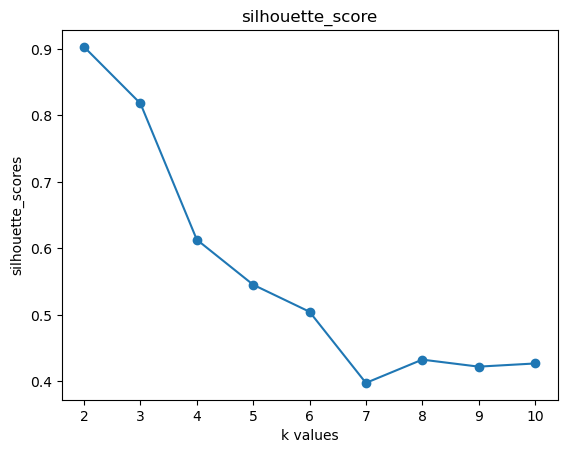

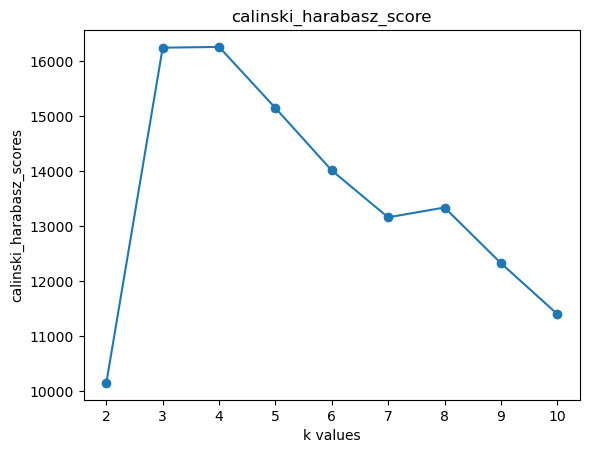

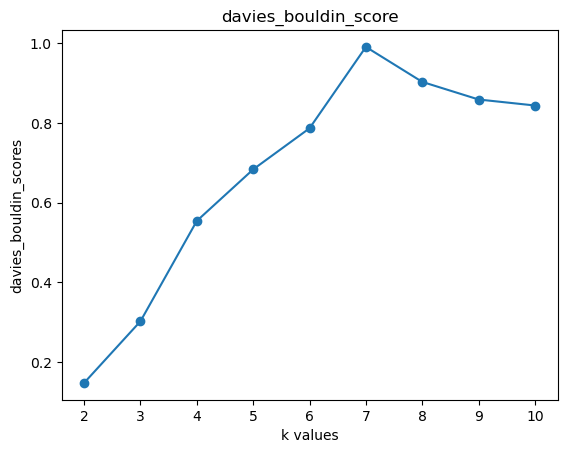

In [14]:
import matplotlib.pyplot as plt
shil = []
cali = []
davi = []
k_val = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 'auto').fit(X_train)
    sm = ss(X_train, kmeans.labels_)
    shil.append(sm)
    cali.append(chs(X_train, kmeans.labels_))
    davi.append(dbs(X_train, kmeans.labels_))
    k_val.append(k)
scores = pd.DataFrame({'silhouette_score': shil, 'calinski_harabasz_score': cali, 'davies_bouldin_score': davi})

#silhouette_score
plt.plot(k_val, shil, marker = 'o')
plt.title("silhouette_score")
plt.xlabel("k values")
plt.ylabel('silhouette_scores')
plt.show()

#calinski_harabasz_score
plt.plot(k_val, cali, marker = 'o')
plt.title("calinski_harabasz_score")
plt.xlabel("k values")
plt.ylabel('calinski_harabasz_scores')
plt.show()

#davies_bouldin_score
plt.plot(k_val, davi, marker = 'o')
plt.title("davies_bouldin_score")
plt.xlabel("k values")
plt.ylabel('davies_bouldin_scores')
plt.show()

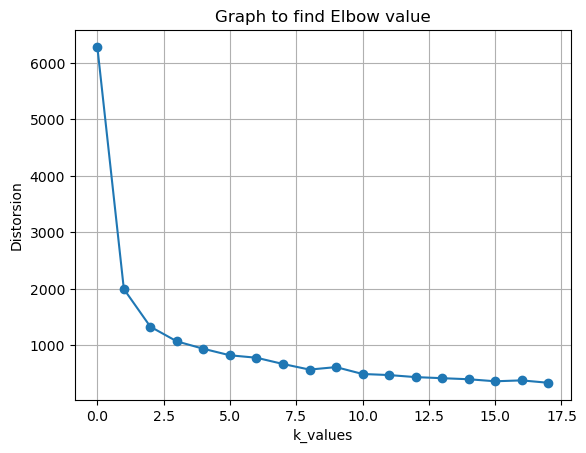

In [16]:
distorsions = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k).fit(X_train)
    distorsions.append(kmeans.inertia_)
#graph to find best K value
plt.plot(distorsions, marker = 'o')
plt.title('Graph to find Elbow value')
plt.xlabel('k_values')
plt.ylabel('Distorsion')
plt.grid(True)
plt.show()

In [ ]:
#end